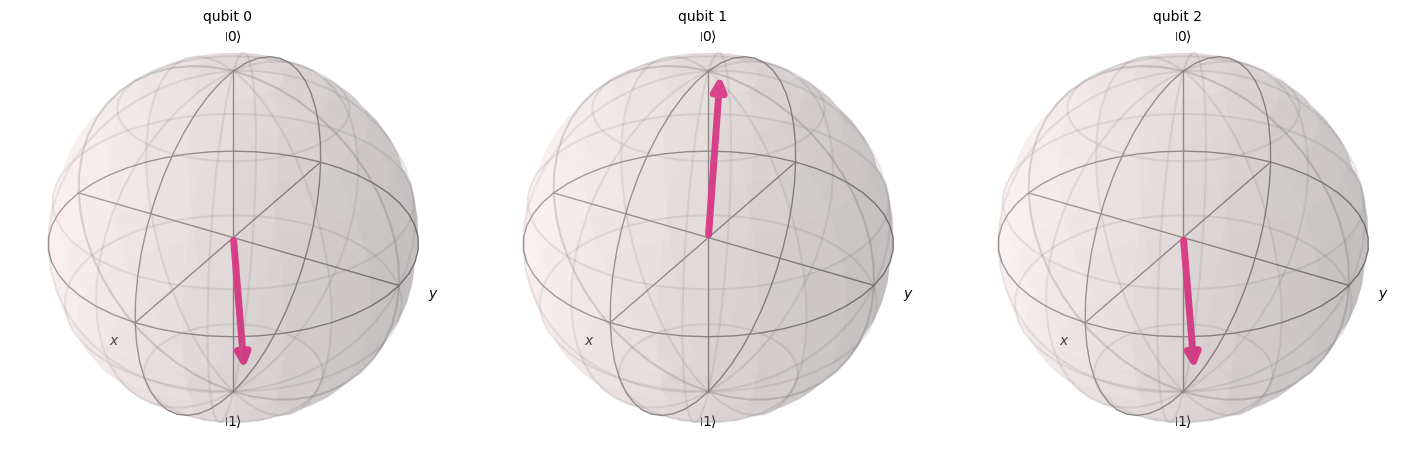

{'101': 91, '011': 3, '111': 3, '001': 2, '100': 1}


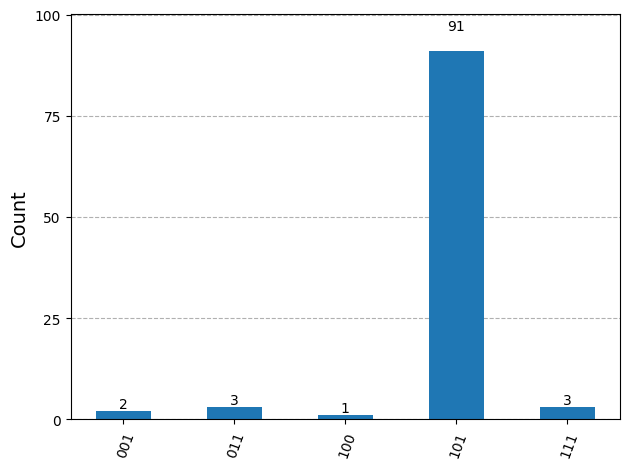

In [ ]:
from qiskit import *
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram,plot_bloch_multivector
import matplotlib.pyplot as plt
%matplotlib inline

#oracle with toffoli gate and 
#101

# oracle=QuantumCircuit(3,name="oracle")
# oracle.x(1)
# oracle.h(1)
# oracle.ccx(0,2,1)
# oracle.h(1)
# oracle.x(1)
# oracle.to_gate()

def grover_oracle(treasure:str):
    qc=QuantumCircuit(3,name="oracle")
    for i,bit in enumerate(reversed(treasure)):
        if bit=="0":
            qc.x(i)

    qc.h(2)
    qc.ccx(0,1,2)
    qc.h(2)
    for i,bit in enumerate(reversed(treasure)):
        if bit=="0":
            qc.x(i)

    return qc.to_gate()

def grover_diffusion():
    diffusion=QuantumCircuit(3)
    diffusion.h([0,1,2])
    diffusion.x([0,1,2])
    diffusion.ccz(0,1,2)
    diffusion.x([0,1,2])
    diffusion.h([0,1,2])
    return diffusion.to_gate(label="Diffusion")

treasure="101"
iteration=2

oracle=grover_oracle(treasure)
diffusion=grover_diffusion()

qc_sv=QuantumCircuit(3)
qc_sv.h([0,1,2])

for _ in range(iteration):
    qc_sv.append(oracle,[0,1,2])
    qc_sv.append(diffusion,[0,1,2])

backend_sv=Aer.get_backend("statevector_simulator")
transpiled_sv=transpile(qc_sv,backend_sv)
result_sv=backend_sv.run(transpiled_sv).result()
state_vector=result_sv.get_statevector()
plot_bloch_multivector(state_vector)
plt.show()

qc_qasm=QuantumCircuit(3,3)
qc_qasm.h([0,1,2])
for _ in range(iteration):
    qc_qasm.append(oracle,[0,1,2])
    qc_qasm.append(diffusion,[0,1,2])

qc_qasm.measure([0,1,2],[0,1,2])

backend_qasm=Aer.get_backend("qasm_simulator")
transpiled_qasm=transpile(qc_qasm,backend_qasm)

result_qasm=backend_qasm.run(transpiled_qasm,shots=100).result()
counts=result_qasm.get_counts()
print(counts)
plot_histogram(counts)
plt.show()


